<a href="https://colab.research.google.com/github/asavari381/Netflix-Stock-Price-Prediction/blob/main/KalmanFilterVsMovingDayAverages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install pykalman

In [22]:
# Import the required library
import pandas_datareader.data as pdr
from datetime import datetime
import yfinance as yf
from pykalman import KalmanFilter as kf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:

# Define the date range
start = '2020-01-01'
end = '2024-10-30'

# Load Netflix stock data
NFLX = yf.download('NFLX', start=start, end=end)

# Extract 'Adj Close' column
NFLX = NFLX['Adj Close']
x = NFLX

# Display the first few rows
print(x.head())


[*********************100%***********************]  1 of 1 completed

Ticker                           NFLX
Date                                 
2020-01-02 00:00:00+00:00  329.809998
2020-01-03 00:00:00+00:00  325.899994
2020-01-06 00:00:00+00:00  335.829987
2020-01-07 00:00:00+00:00  330.750000
2020-01-08 00:00:00+00:00  339.260010


In [24]:
from pykalman import KalmanFilter

#Construct a kalman filter
kf = KalmanFilter(transition_matrices = [1],
                observation_matrices = [1],
                initial_state_mean = 0,
                initial_state_covariance = 1,
                observation_covariance = 1,
                transition_covariance = 1)

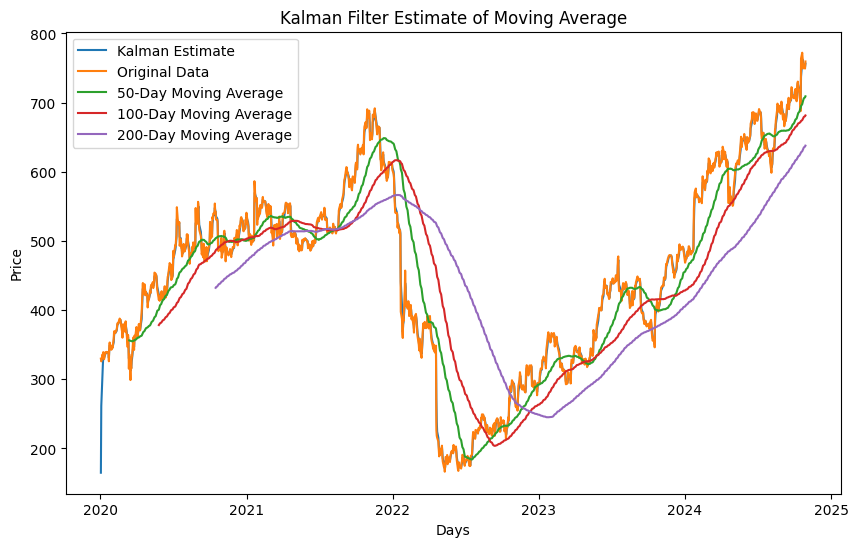

In [29]:
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)  # Unpack the tuple

# Convert the state means to a pandas Series with the correct index
state_means_series = pd.Series(state_means.flatten(), index=x.index)

# Compute rolling mean with various lookback windows
mean50 = x.rolling(50).mean()
mean100 = x.rolling(100).mean()
mean200 = x.rolling(200).mean()

# Plot original data and estimated mean
plt.figure(figsize=(10, 6))
plt.plot(state_means_series, label='Kalman Estimate')
plt.plot(x, label='Original Data')
plt.plot(mean50, label='50-Day Moving Average')
plt.plot(mean100, label='100-Day Moving Average')
plt.plot(mean200, label='200-Day Moving Average')

plt.title('Kalman Filter Estimate of Moving Average')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()